In [250]:
import numpy as np
from Code.pde_solver import PDE_Solver
from Code.bs_solver import BlackScholes_Solver

In [251]:
def g(s):
    return np.maximum(s - E,0)

In [252]:
gamma = 0.4
r = 0.1
T_prime = 5.
t = 0
T = T_prime - t
a_x = 0.5
exp_a_x = np.e ** a_x
E = 1.

sigma = 0.5 * (gamma ** 2)

f = lambda x : np.exp( 1. / (gamma**2) * (r - (0.5) * gamma ** 2) * x ) * g(np.exp(x))
V = lambda x,t : r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2

print "sigma = ", sigma
print "V = ", r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2
print "T = ", T_prime-t

sigma =  0.08
V =  0.10125
T =  5.0


In [253]:
pde = PDE_Solver(sigma=sigma, V=V, f=f, T=T, n=20, a_x=a_x, M=100)
pde.Solve()

In [254]:
pde.u

array([ 0.1953493 ,  0.19963685,  0.20400283,  0.20844836,  0.21297456,
        0.21758253,  0.22227344,  0.22704841,  0.23190861,  0.2368552 ,
        0.24188937,  0.2470123 ,  0.2522252 ,  0.25752927,  0.26292572,
        0.26841581,  0.27400076,  0.27968183,  0.28546029,  0.29133741,
        0.29731448,  0.30339279,  0.30957366,  0.3158584 ,  0.32224835,
        0.32874485,  0.33534925,  0.34206293,  0.34888726,  0.35582362,
        0.36287344,  0.37003811,  0.37731906,  0.38471774,  0.39223559,
        0.39987408,  0.40763468,  0.41551888,  0.42352819,  0.43166411,
        0.43992818,  0.44832194,  0.45684694,  0.46550474,  0.47429693,
        0.4832251 ,  0.49229086,  0.50149584,  0.51084166,  0.52032998,
        0.52996246,  0.53974078,  0.54966664,  0.55974175,  0.56996783,
        0.58034661,  0.59087985,  0.60156933,  0.61241682,  0.62342413,
        0.63459308,  0.6459255 ,  0.65742324,  0.66908816,  0.68092216,
        0.69292713,  0.70510499,  0.71745767,  0.72998713,  0.74

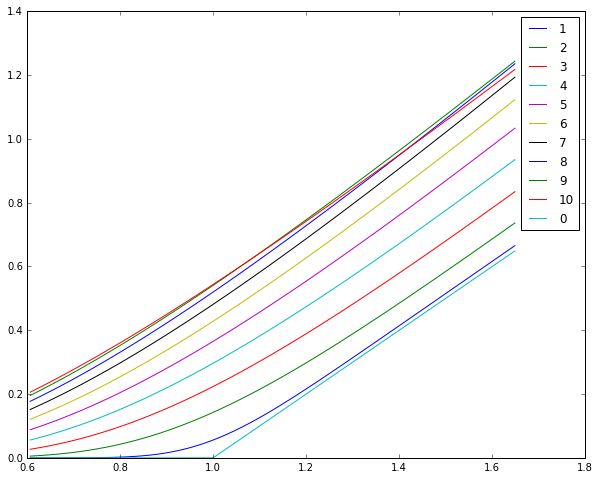

In [255]:
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
%matplotlib inline
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M=100
tt = np.array(t_variants)
tt = np.reshape(tt, [1,tt.shape[0]])
tt_row = tt
for i in range(M):
    tt = np.append(tt, tt_row, axis = 0)

tt = tt*T_prime 

Function_values = np.reshape(np.array([None] * 101),[101,1])
costs = np.reshape(np.array([None] * 101),[101,1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    cur = np.reshape(np.array(bs.s), [101,1])
    costs = np.append(costs, cur, axis = 1)
    cur_2 = np.reshape(np.array(bs.c), [101,1])
    Function_values = np.append(Function_values, cur_2, axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


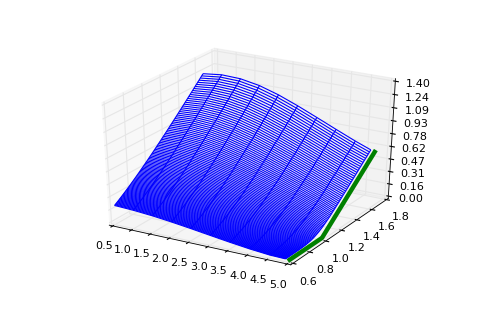

In [256]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(tt, costs[:,1:], Function_values[:,1:])
ax.plot(np.ones(101)*T_prime, bs.s, g(bs.s),linewidth=4,color='g')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [242]:
def d_plus(cur_t, s):
    return (math.log(s / E) + (r + (gamma ** 2 / 2.)) * (T_prime - cur_t)) / (gamma * math.sqrt(T_prime - cur_t))

def d_minus(cur_t, s):
    return (math.log(s / E) + (r - (gamma ** 2 / 2.)) * (T_prime - cur_t)) / (gamma * math.sqrt(T_prime - cur_t))

def c_true(s, cur_t):
    return s * norm.cdf(d_plus(cur_t, s)) - E * math.exp(-r * (T_prime - cur_t)) * norm.cdf(d_minus(cur_t, s))

<IPython.core.display.Javascript object>


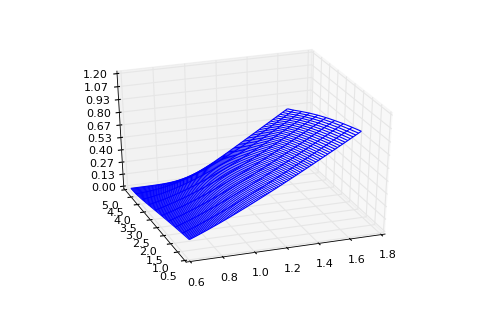

In [257]:
f_1 = np.zeros([Function_values.shape[0],Function_values.shape[1]-1])

for j in range(Function_values.shape[1]-1):
    for i in range(Function_values.shape[0]):
        f_1[i, j] = c_true(costs[i, j + 1], tt[i, j])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(costs[:,1:],tt,  f_1)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [258]:
def g(s):
    res = np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        if s[i] >= E:
            res[i] = B
    return res

B = 5.
E = 1.

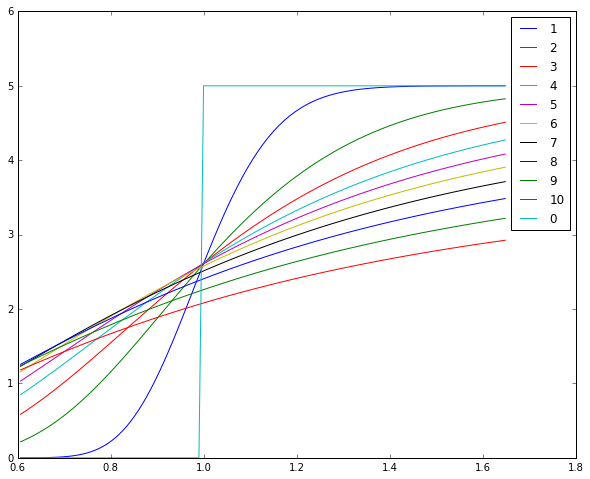

In [259]:
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
%matplotlib inline
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
M = 100
tt = np.array(t_variants)
tt = np.reshape(tt, [1,tt.shape[0]])
tt_row = tt
for i in range(M):
    tt = np.append(tt, tt_row, axis = 0)

tt = tt*T_prime 

Function_values = np.reshape(np.array([None] * 101),[101,1])
costs = np.reshape(np.array([None] * 101),[101,1])

labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    cur = np.reshape(np.array(bs.s), [101,1])
    costs = np.append(costs, cur, axis = 1)
    cur_2 = np.reshape(np.array(bs.c), [101,1])
    Function_values = np.append(Function_values, cur_2, axis = 1)
    plt.plot(bs.s, bs.c, label=labels[i])

plt.plot(bs.s, g(bs.s), label = labels[-1])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


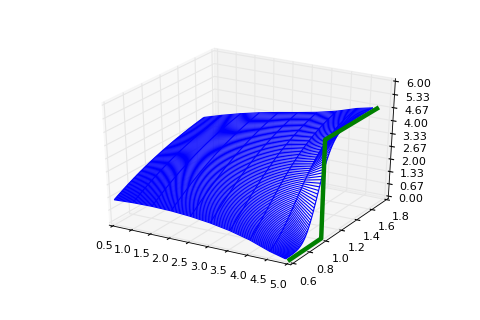

In [260]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(tt, costs[:,1:], Function_values[:,1:])
ax.plot(np.ones(101)*T_prime, bs.s, g(bs.s),linewidth=4,color='g')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [248]:
def c_true_2(s, cur_t):
    return B * np.exp(-r * (T_prime-cur_t))* norm.cdf(d_plus(cur_t, s))

<IPython.core.display.Javascript object>


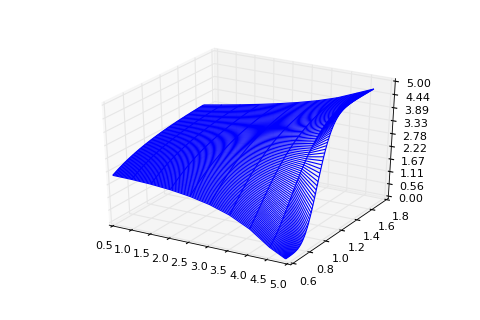

In [261]:
f_1 = np.zeros([Function_values.shape[0],Function_values.shape[1]-1])

for j in range(Function_values.shape[1]-1):
    for i in range(Function_values.shape[0]):
        f_1[i, j] = c_true_2(costs[i, j+1], tt[i, j])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(tt.T, costs[:,1:].T, f_1.T)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()